In [121]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score,confusion_matrix,classification_report,mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [122]:
df=pd.read_csv('./rideshare_kaggle.csv')

### Understanding Data

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [124]:
df.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,...,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,...,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,...,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,...,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,...,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,...,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,...,0.091600,1.544807e+09,38.880000,1.544789e+09,46.910000,1.544814e+09,35.710000,1.544789e+09,44.120000,1.544818e+09
max,1.545161e+09,23.000000,30.000000,12.000000,97.500000,7.860000,3.000000,42.366100,-71.033000,57.220000,...,0.145900,1.545152e+09,43.100000,1.545192e+09,57.870000,1.545109e+09,40.050000,1.545134e+09,57.200000,1.545109e+09


In [125]:
df.isna().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

Text(0, 0.5, 'Columns')

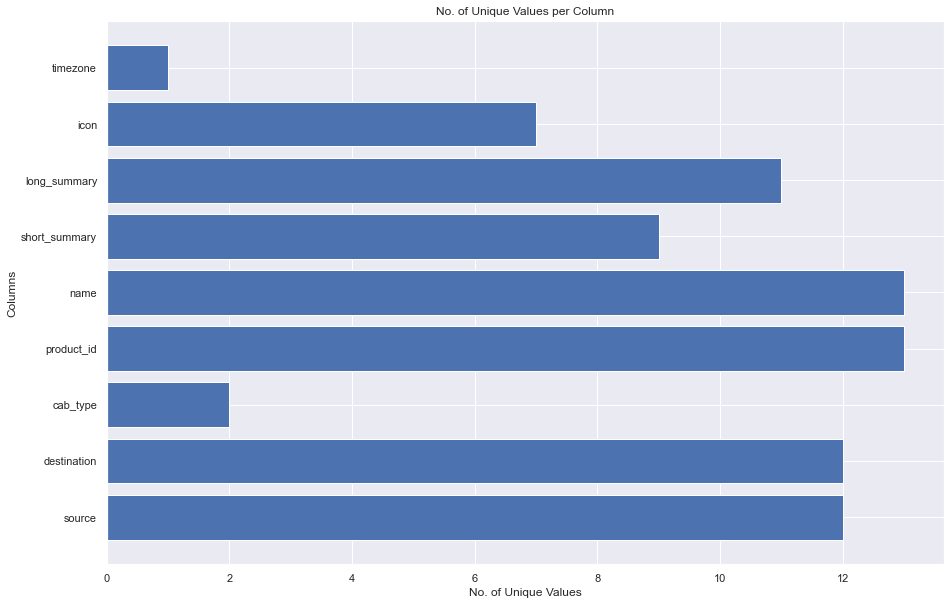

In [126]:
col_vs_values = plt.figure(figsize=(15, 10))
col_list = ['source','destination','cab_type','product_id','name','short_summary','long_summary','icon','timezone']
unique_val = []
for data in col_list :
    unique_val += [len(pd.unique(df[data]))]
plt.barh(col_list,unique_val)
plt.title("No. of Unique Values per Column")
plt.xlabel("No. of Unique Values")
plt.ylabel("Columns")

<AxesSubplot:>

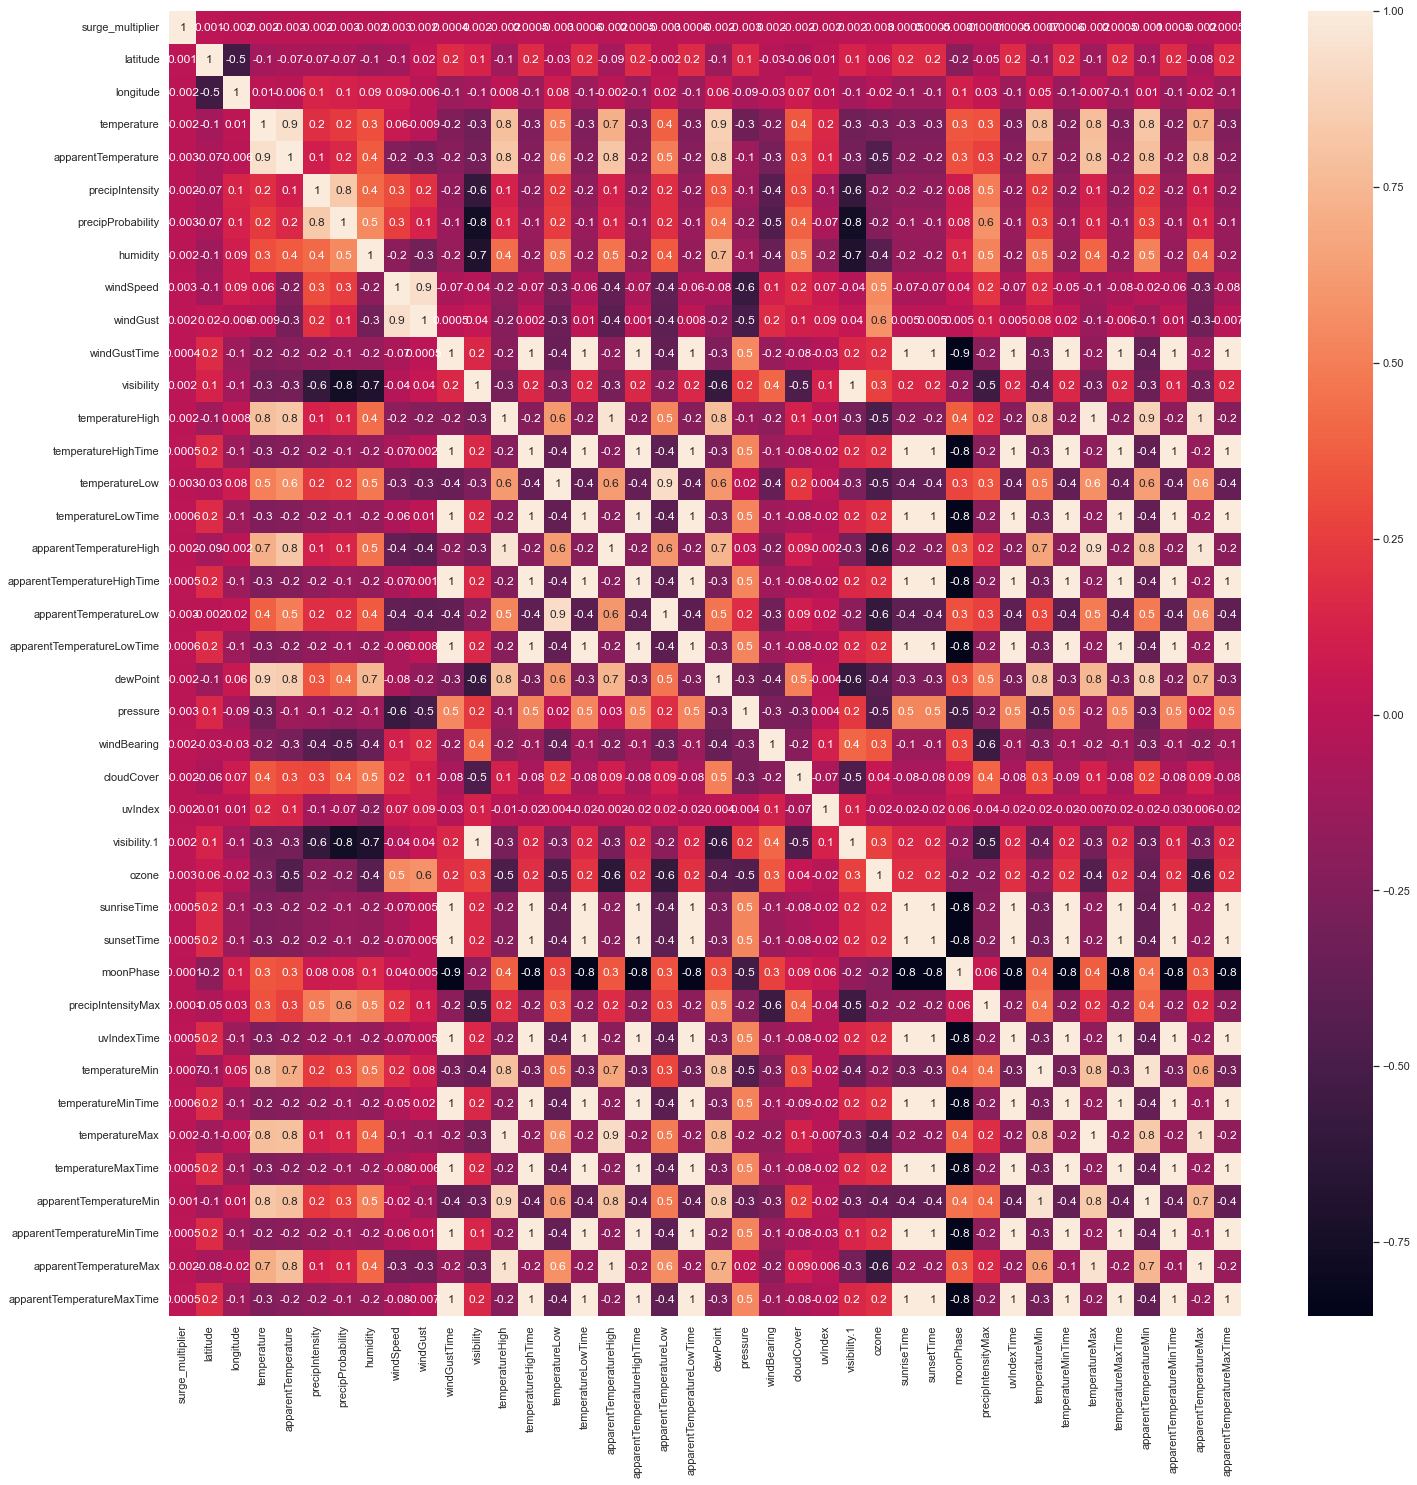

In [127]:
corr_df = df[['surge_multiplier','latitude', 'longitude', 'temperature',
        'apparentTemperature','precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperatureMax', 'apparentTemperatureMaxTime']]

fig, ax = plt.subplots(figsize=(24, 24))

sns.heatmap(corr_df.corr(), ax=ax, annot=True,fmt='.1g')

<AxesSubplot:>

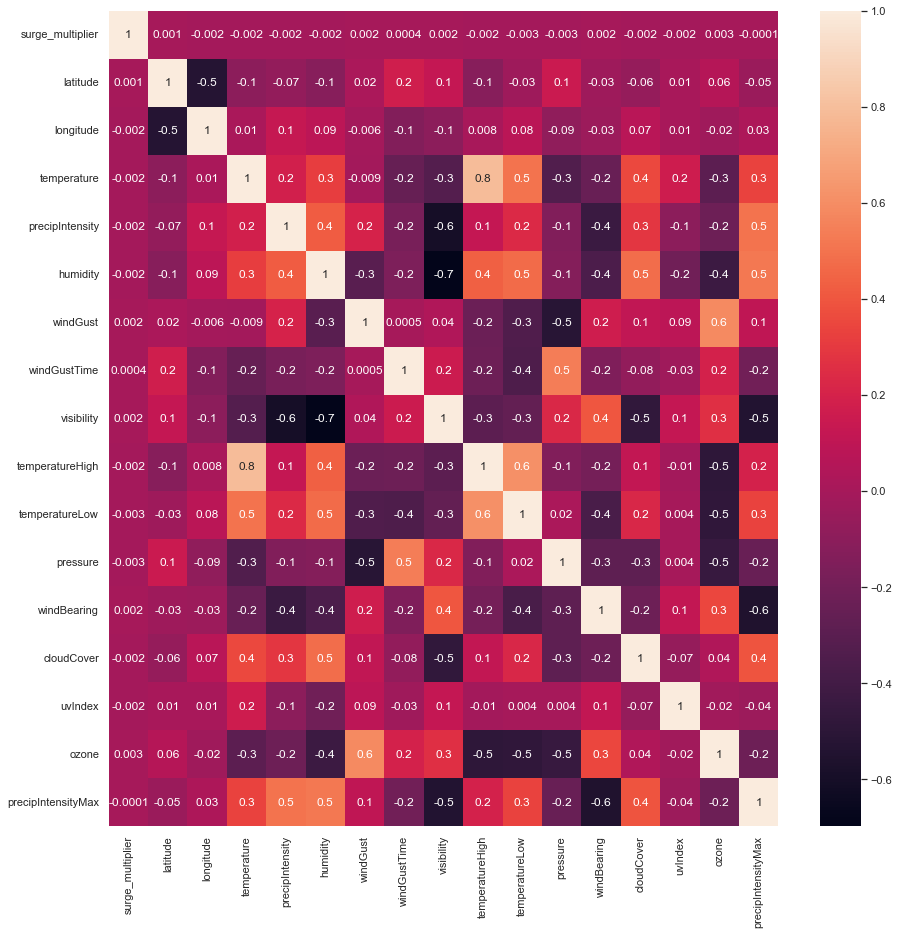

In [128]:
corr_df = df[['surge_multiplier','latitude', 'longitude', 'temperature',
        'precipIntensity', 'humidity','windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureLow','pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'ozone','precipIntensityMax']]

fig, ax = plt.subplots(figsize=(15, 15))

sns.heatmap(corr_df.corr(), ax=ax, annot=True,fmt='.1g')

### Data preprocessing

In [129]:
df = df.dropna()
N = df.shape[0]

In [130]:
df.loc[df.cab_type=='Uber','product_id'] = 'Uber'
df = df.drop(["id","timezone","datetime","apparentTemperature","precipProbability","windSpeed","temperatureHighTime","temperatureLowTime",'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime','dewPoint','visibility.1','sunriseTime', 'sunsetTime', 'moonPhase','uvIndexTime','temperatureMinTime','temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperatureMax', 'apparentTemperatureMaxTime','temperatureMin', 'temperatureMax'],axis="columns")

### Data visualization

Text(0, 0.5, 'Average price (in $)')

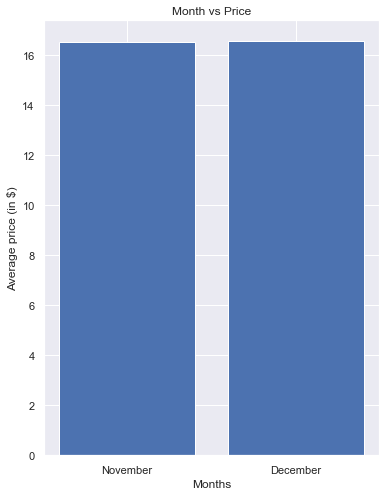

In [131]:
## Month vs price
month_vs_price = plt.figure(figsize=(6, 8))
lst = []
for i in range(11,13) :
    price = df.loc[df.month==i]['price'].mean()
    lst += [price]
plt.bar(['November','December'],lst)
plt.title("Month vs Price")
plt.xlabel("Months")
plt.ylabel("Average price (in $)")

Text(0, 0.5, 'V->\nAverage Price(in $)(V+16)')

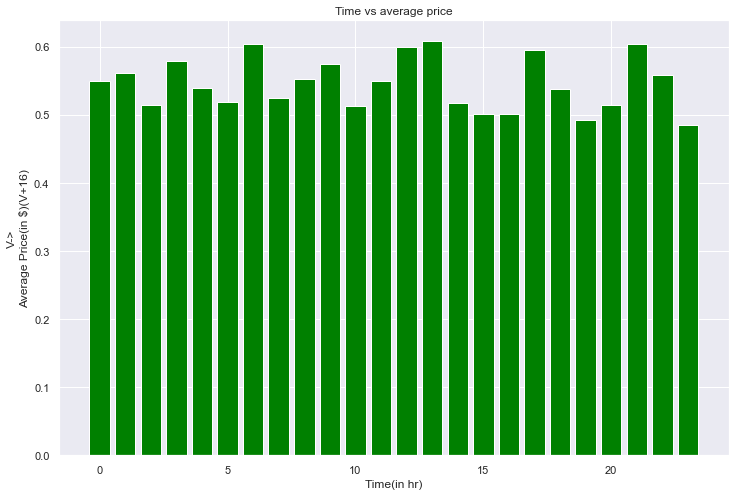

In [132]:
## time vs average price
time_price = plt.figure(figsize=(12, 8))
lst = df['hour'].unique()
num = [0]*len(lst)
for data in lst :
    num[data] += df[df.hour==data]['price'].mean()-16
plt.bar(lst,num,color = "green")
plt.title("Time vs average price")
plt.xlabel("Time(in hr)")
plt.ylabel("V->\nAverage Price(in $)(V+16)")


Text(0, 0.5, 'Number of cabs')

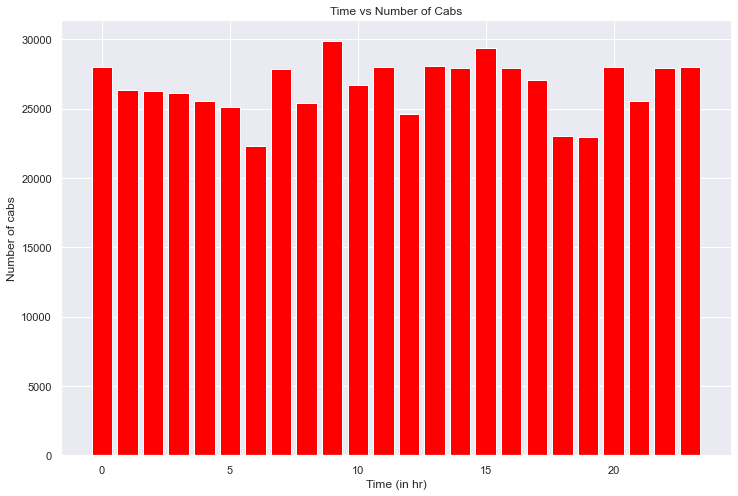

In [133]:
## time vs number of cabs
time_vs_cabs = plt.figure(figsize=(12, 8))
lst = df['hour'].unique()
num = [0]*24
for data in lst :
    num[data] = len(df[df.hour==data])
plt.bar(lst,num,color = "red")
plt.title("Time vs Number of Cabs")
plt.xlabel("Time (in hr)")
plt.ylabel("Number of cabs")

Text(0, 0.5, 'Price')

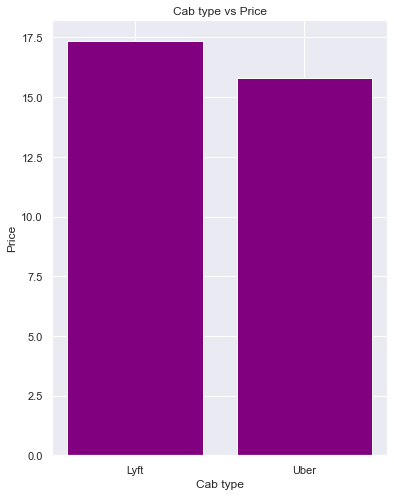

In [134]:
## cab type vs price
cab_vs_price = plt.figure(figsize=(6, 8))
lst = df['cab_type'].unique()
avg_price = []
for data in lst :
    new_df = df[df.cab_type == data]
    avg_price += [new_df['price'].mean()]
plt.bar(lst,avg_price,color = "purple")
plt.title("Cab type vs Price")
plt.xlabel("Cab type")
plt.ylabel("Price")

Text(0.5, 0, 'Price')

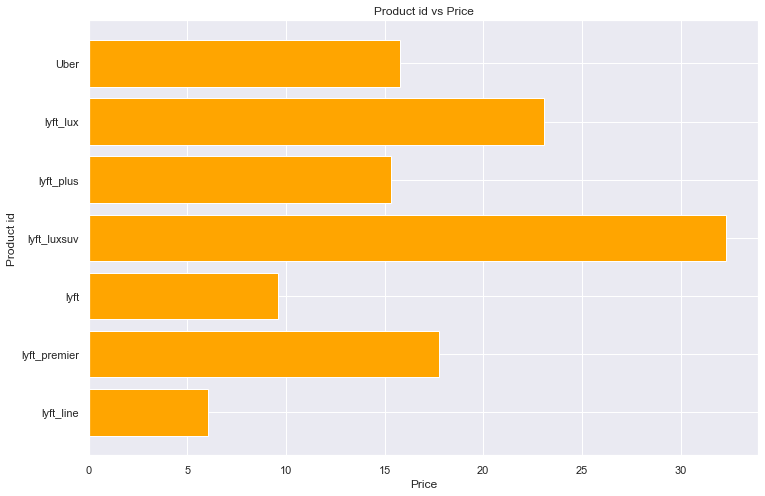

In [135]:
## product id vs price
prod_vs_price = plt.figure(figsize=(12, 8))
lst = df['product_id'].unique()
avg_price = []
for data in lst :
    avg_price += [df[df.product_id == data]['price'].mean()]
plt.barh(lst,avg_price,color = "orange")
plt.title("Product id vs Price")
plt.ylabel("Product id")
plt.xlabel("Price")

Text(0, 0.5, 'Climate conditions')

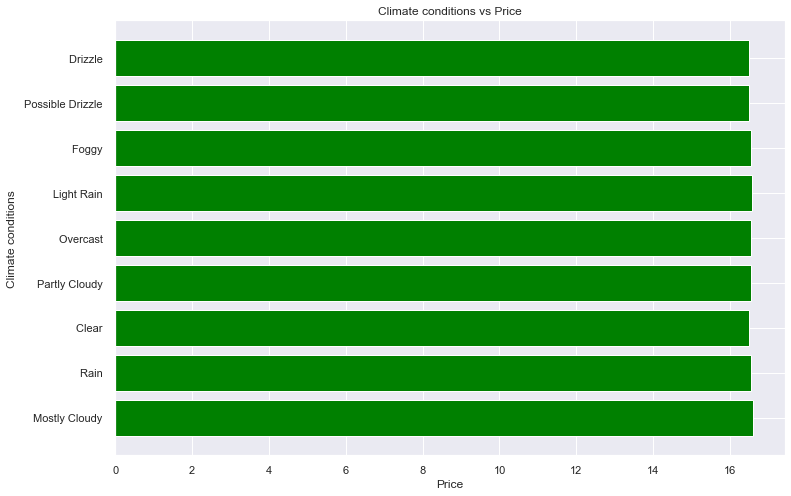

In [136]:
## climate conditions vs price
climate_vs_price = plt.figure(figsize=(12, 8))
lst = df['short_summary'].unique()
avg_price = []
for data in lst :
    avg_price += [df[df.short_summary==data]['price'].mean()]
plt.barh(lst,avg_price,color = "green")
plt.title("Climate conditions vs Price")
plt.xlabel("Price")
plt.ylabel("Climate conditions")

Text(0, 0.5, 'Source')

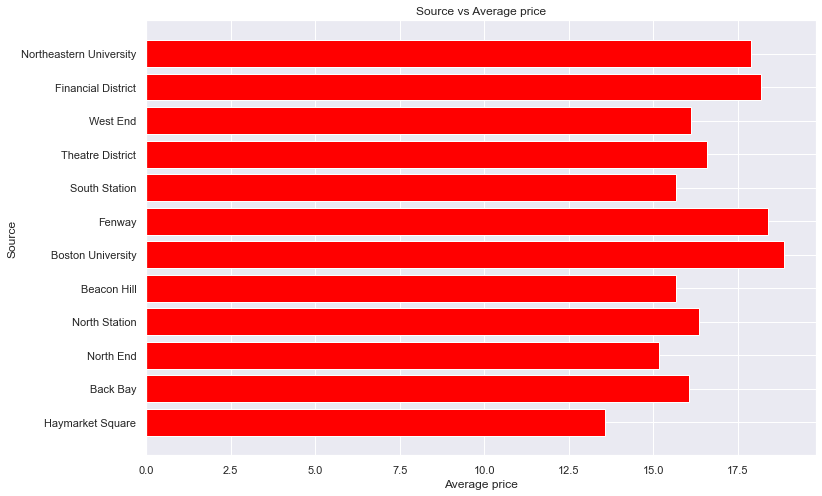

In [137]:
## source vs avg price
source_vs_price = plt.figure(figsize=(12, 8))
lst = df['source'].unique()
Dist = {}
for data in lst :
    Dist[data] = df[df.source == data]['price'].mean()
plt.barh(list(Dist.keys()),Dist.values(),color = "red")
plt.title("Source vs Average price")
plt.xlabel("Average price")
plt.ylabel("Source")

Text(0, 0.5, 'Destination')

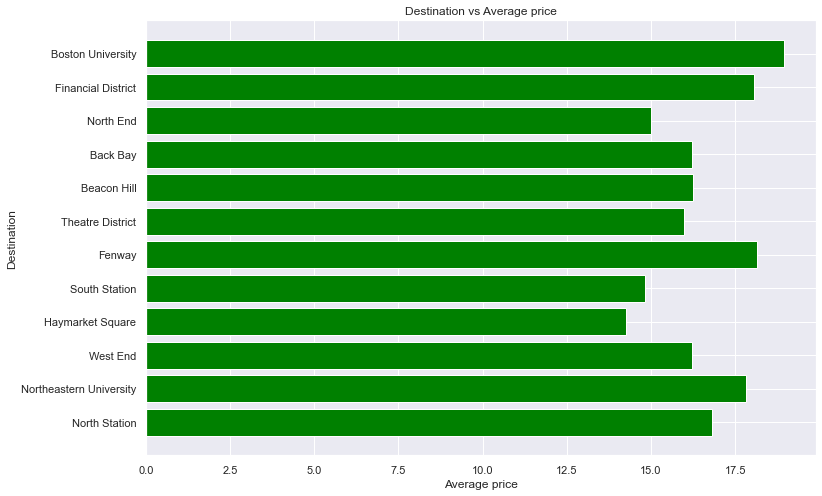

In [138]:
## destinations vs avg price
dest_vs_price = plt.figure(figsize=(12, 8))
lst = df['destination'].unique()
Dist = {}
for data in lst :
    Dist[data] = df[df.destination == data]['price'].mean()
plt.barh(list(Dist.keys()),Dist.values(),color = "green")
plt.title("Destination vs Average price")
plt.xlabel("Average price")
plt.ylabel("Destination")

Text(0, 0.5, 'Source')

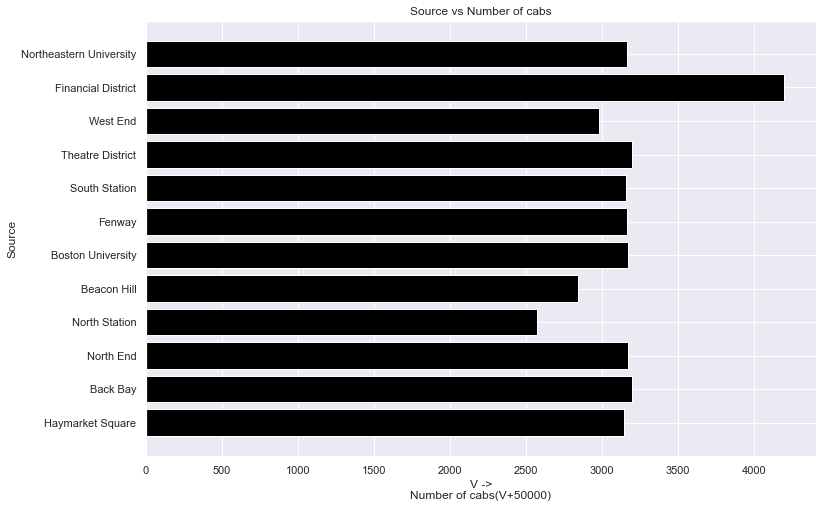

In [139]:
## source vs number of cabs
source_vs_cabs = plt.figure(figsize=(12, 8))
lst = df['source'].unique()
Dist = {}
for data in lst :
    Dist[data] = len(df[df.source == data])-50000
plt.barh(list(Dist.keys()),list(Dist.values()),color = "black")
plt.title("Source vs Number of cabs")
plt.xlabel("V ->\nNumber of cabs(V+50000)")
plt.ylabel("Source")

Text(0, 0.5, 'Destinations')

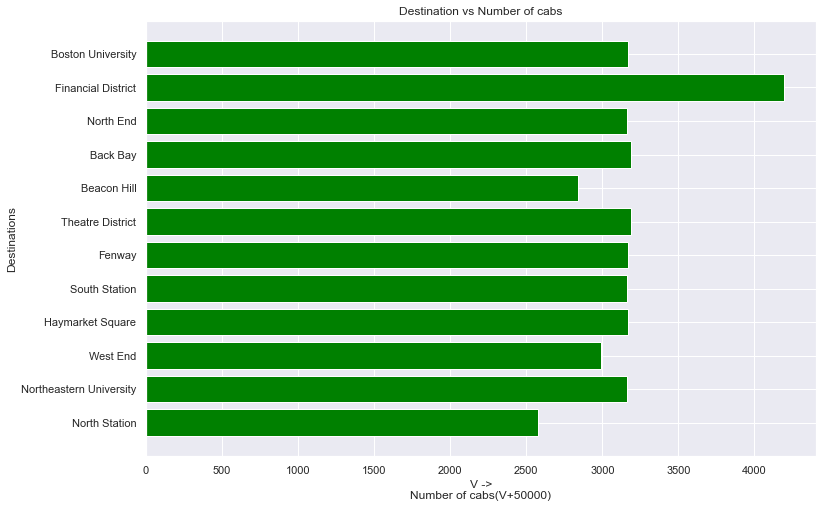

In [140]:
## destinations vs number of cabs
dest_vs_cabs = plt.figure(figsize=(12, 8))
lst = df['destination'].unique()
Dist = {}
for data in lst :
    Dist[data] = len(df[df.destination == data])-50000
plt.barh(list(Dist.keys()),Dist.values(),color = "green")
plt.title("Destination vs Number of cabs")
plt.xlabel("V ->\nNumber of cabs(V+50000)")
plt.ylabel("Destinations")


<BarContainer object of 6 artists>

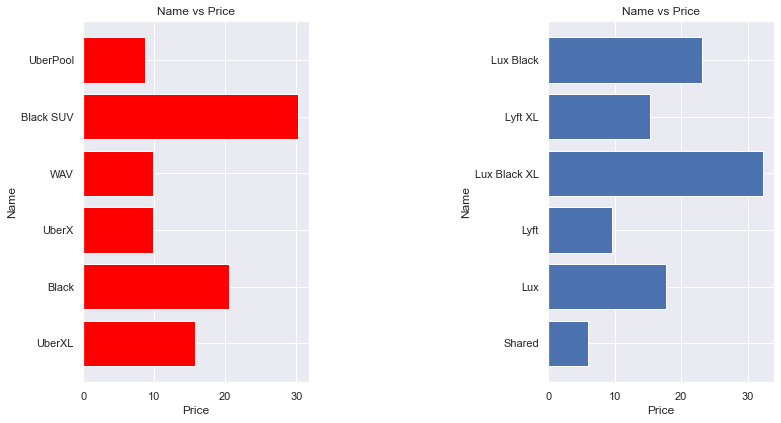

In [141]:
# name vs price
figure,axis = plt.subplots(1,2)
figure.tight_layout(pad = 5)
figure.set_figwidth(15)
figure.set_figheight(10)

lst = df[df.cab_type == 'Uber']['name'].unique()
avg_price = []
for data in lst :
    avg_price += [df[df.name == data]['price'].mean()]
axis[0].title.set_text('Name vs Price')
axis[1].title.set_text('Name vs Price')
axis[0].set_xlabel('Price')
axis[1].set_xlabel('Price')
axis[1].set_ylabel('Name')
axis[0].set_ylabel('Name')
axis[0].barh(lst,avg_price,color = "red")

lst = df[df.cab_type == 'Lyft']['name'].unique()
avg_price = []
for data in lst :
    avg_price += [df[df.name == data]['price'].mean()]
axis[1].barh(lst,avg_price)



#### Data encoding

In [146]:
New_df = df
New_df['hour'] = New_df['hour'].astype(str)
r2Lst = []

from sklearn.decomposition import PCA
for i in range(17) :
       pca = PCA(n_components=i)
       pca_df = pd.DataFrame(pca.fit_transform(New_df[['surge_multiplier','latitude','longitude','temperature','precipIntensity','humidity','windGust','windGustTime',
                                  'visibility','temperatureHigh','temperatureLow','pressure','windBearing','cloudCover',
                                  'uvIndex','ozone','precipIntensityMax']]))
       encode_df = New_df[['timestamp', 'hour','source', 'destination',
       'cab_type', 'product_id', 'name', 'price','short_summary', 'long_summary','icon','distance','day','month']]
       encode_df = pd.get_dummies(encode_df,columns=['source','destination','cab_type','product_id','name','short_summary','long_summary','icon','hour'],drop_first=False)
       pca_df = pd.concat([pca_df,encode_df],axis = 1,join = 'inner')
       x = pca_df.drop(['price'],axis='columns')
       y = pca_df['price']

       x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,random_state=10)

       model = linear_model.LinearRegression()
       model.fit(x_train,y_train)
       pred_val = model.predict(x_test)
       r2Score = r2_score(y_test,pred_val)
       r2Lst.append(r2Score)
       # print('R2 Score is : ',r2Score)
       # print('Root mean square error is : ',mean_squared_error(y_test,pred_val,squared=False))
       

       

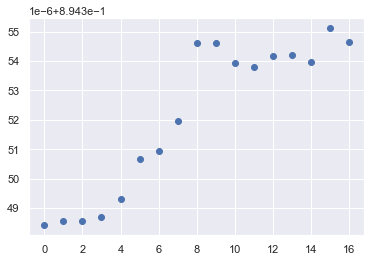

In [143]:
plt.scatter(range(17),r2Lst)

#### Predicting Price

In [147]:
pca = PCA(n_components=15)
pca_df = pd.DataFrame(pca.fit_transform(New_df[['surge_multiplier','latitude','longitude','temperature','precipIntensity','humidity','windGust','windGustTime',
                                  'visibility','temperatureHigh','temperatureLow','pressure','windBearing','cloudCover',
                                  'uvIndex','ozone','precipIntensityMax']]))
encode_df = New_df[['timestamp', 'hour','source', 'destination',
       'cab_type', 'product_id', 'name', 'price','short_summary', 'long_summary','icon','distance','day','month']]
encode_df = pd.get_dummies(encode_df,columns=['source','destination','cab_type','product_id','name','short_summary','long_summary','icon','hour'],drop_first=False)
New_df = pd.concat([pca_df,encode_df],axis = 1,join = 'inner')
x = New_df.drop(['price'],axis='columns')
y = New_df['price']

x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,random_state=10)

model = linear_model.LinearRegression()
model.fit(x_train,y_train)
pred_val = model.predict(x_test)
print('R2 Score is : ',r2_score(y_test,pred_val))
print('Root mean square error is : ',mean_squared_error(y_test,pred_val,squared=False))

R2 Score is :  0.8943551296132171
Root mean square error is :  3.0373494549332767


#### Predicting what is minimum price for a particular day

In [150]:
## creating sample x and y
sample = New_df.sample()
# print (sample)

sample = sample.reset_index().drop('index',axis = 'columns')
sample_x = sample.drop(['price'],axis = 'columns')
sample_y = sample['price']
string = 'hour_'
actual_hr = -1
for i in range(24) :
    if 1 in sample_x[string + str(i)].unique() :
        actual_hr = i
        sample_x[string+str(i)] = 0
        break
min_price = 1000
ans = 0
for i in range(24) :
    sample_x['hour_'+str(i)] = 1
    price = model.predict(sample_x)[0]
    # print(type(price))
    sample_x['hour_'+str(i)] = 0
    # print(i,price)
    if price < min_price :
        # print("hello")
        min_price = price
        ans = i
print("Predicted Minimum price and hour")
print(min_price,ans)
print("************")
print("Actual price and hour")
print(sample_y[0],actual_hr)

Predicted Minimum price and hour
10.5816504366162 0
************
Actual price and hour
9.0 1


#### Predicting what cab should someone get at a particular a price

In [151]:
from sklearn.tree import DecisionTreeClassifier

df_cab=df[['day','month','hour','source','destination','price','distance','name']]
df_cab['hour'] = df_cab['hour'].astype(str)
df_cab = pd.get_dummies(df_cab,columns = ['source','destination','hour'],drop_first = True)

x_cabPred=df_cab.drop(['name'],axis='columns')
y_cabPred=df['name']
labels = df['name'].unique()

X_train, X_test, y_train, y_test = train_test_split(x_cabPred, y_cabPred, test_size = 0.3, random_state = 100)
modelTree=DecisionTreeClassifier(max_depth=25,random_state=100)
modelTree.fit(X_train,y_train)

y_pred = modelTree.predict(X_test)
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

       Black       0.89      0.91      0.90     16392
   Black SUV       0.92      0.93      0.92     16513
         Lux       0.67      0.69      0.68     15333
   Lux Black       0.85      0.86      0.85     15259
Lux Black XL       0.88      0.88      0.88     15404
        Lyft       0.86      0.87      0.86     15457
     Lyft XL       0.71      0.68      0.70     15373
      Shared       0.94      0.92      0.93     15133
    UberPool       0.67      0.68      0.67     16566
       UberX       0.34      0.33      0.34     16809
      UberXL       0.83      0.83      0.83     16462
         WAV       0.35      0.35      0.35     16692

    accuracy                           0.74    191393
   macro avg       0.74      0.74      0.74    191393
weighted avg       0.74      0.74      0.74    191393



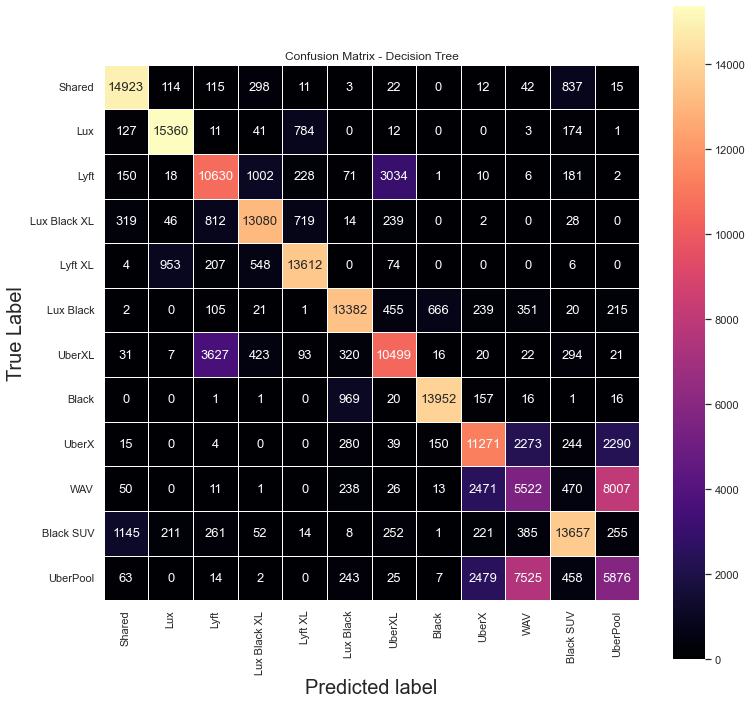

In [152]:
corr_fig = plt.figure(figsize=(12,12))
c_matrix = confusion_matrix(y_test,y_pred)
matrix_df = pd.DataFrame(c_matrix)
ax = plt.axes()
sns.set(font_scale=1)
map = sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma",square=True,linewidths=1,annot_kws={'size':13})
ax.set_title('Confusion Matrix - Decision Tree')
ax.set_xlabel("Predicted label", fontsize =20)
ax.set_xticklabels(['']+labels,rotation = 90)
ax.set_ylabel("True Label", fontsize=20)
ax.set_yticklabels(list(labels), rotation = 0)
plt.show()

In [153]:
## finding which cab should be taken by user to get minimum price
sample=df_cab.sample()
sample = sample.reset_index().drop('index',axis = 'columns')

sampleInput=sample.drop(['name'],axis='columns')

actual_price = sampleInput['price'].iloc[0]
approxPrice = float(input("Enter the approximate price : "))
sampleInput['price'] = approxPrice

predValue=modelTree.predict(sampleInput)

print('The predicted name is ')
print(predValue)
print('The input price is ')
print(approxPrice)
print('The actual name is ')
print(sample['name'].iloc[0])
print('The actual price is ')
print(actual_price)

The predicted name is 
['Shared']
The input price is 
3.4
The actual name is 
WAV
The actual price is 
13.5


In [154]:
sampleData = New_df.sample()
sampleData = sampleData.reset_index().drop('index',axis='columns')

check_df = pd.DataFrame()

xSample = sampleData.drop('price',axis='columns')
ySample = sampleData['price']

src = input("Enter source : ")
dest = input("Enter destination : ")
dist = float(input("Enter distance : "))

srcString = 'source_'
destString = 'destination_'
nameString = 'name_'

lstSrc = df['source'].unique()
lstDest = df['destination'].unique()
lst = df['name'].unique()

for data in lstSrc :
    xSample[srcString+data].iloc[0] = 0
for data in lstDest :
    xSample[destString+data].iloc[0] = 0
for data in lst :
    xSample[nameString+data].iloc[0] = 0

xSample[srcString+src] = 1
xSample[destString+dest] = 1
xSample['distance'].iloc[0] = dist

print('Cab name    Price')

for data in lst :
    xSample[nameString+data].iloc[0] = 1
    price = model.predict(xSample)[0]
    print(data,"    ",price)


Cab name    Price
Shared      15.76455287194949
Lux      16.056021947513727
Lyft      12.261810865274128
Lux Black XL      19.811937734727962
Lyft XL      18.869571555101174
Lux Black      21.792206974476812
UberXL      21.59730749815799
Black      26.277240819034887
UberX      20.16575409635925
WAV      14.063718304334998
Black SUV      28.470110223342544
UberPool      21.346298481156737
